In [1]:
# 绿色的是predict的
import pickle
import json
import numpy as np
import cv2
from utils import *
from multiprocessing.pool import RUN
import numpy as np
# import open3d as o3d
import cv2
import pickle
# from mpl_toolkits.mplot3d import Axes3D
from numpy import *
# from pylab import *
connect = np.array([(0,4),(1,5),(2,6),(2,19),(3,7),(3,20),(4,8),(5,9),
                              (6,10),(7,12),(8,14),(9,14),(10,11),(11,12),(11,14),(13,14),
                              (13,15),(13,16),(15,17),(16,18)])
def show_pose_on_image(pose_pc,pose_gt,ori_pcd,img_path,img_width,img_height,camera_json = 'camera_person3.json',bbox= np.array((0,0))):
    img = cv2.imread(img_path)
    for single_pose in [pose_pc,pose_gt]:
        color = tuple([0,0,255])   # gt
        print(single_pose.shape)
        if single_pose.shape[-1] != 2:
            color = np.random.randint(0,255,(1,3)).squeeze(0)
            color = tuple([0,255,125])
        
            single_pose = world2cam_one_seq(single_pose,camera_json)
        pose2d = single_pose[:,:2]
        if bbox.shape[0] != 0:
            pose2d = pose2d-bbox
        # Index of points in fov
        fov_inds = (
            (pose2d[:, 0] < 1000000000)
            & (pose2d[:, 0] >= 0)
            & (pose2d[:, 1] < 1000000000)
            & (pose2d[:, 1] >= 0)
        )
        # fov_inds = fov_inds & (single_pose[:, 0] > 0)
#         print(single_pose,fov_inds,img_width)
        imgfov_pose2d = pose2d[fov_inds,:]
        for i in range(imgfov_pose2d.shape[0]):
            cv2.circle(
                img,
                (np.int64(imgfov_pose2d[i, 0]), np.int64(imgfov_pose2d[i, 1])),
                1,
                color=color,
                thickness=-1,
            )
            
        connect = np.array([(0,4),(1,5),(2,6),(2,19),(3,7),(3,20),(4,8),(5,9),
                              (6,10),(7,12),(8,14),(9,14),(10,11),(11,12),(11,14),(13,14),
                              (13,15),(13,16),(15,17),(16,18)])
#         connect = np.array([[16, 14], [14, 12], [17, 15], [15, 13], [12, 13], [6, 12], [7, 13], [6, 7], [6, 8], [7, 9], [8, 10], [9, 11], [2, 3], [1, 2], [1, 3], [2, 4], [3, 5], [4, 6], [5, 7]])-1

        for i in range(len(connect[:,0])):
            if fov_inds[connect[i][0]] & fov_inds[connect[i][1]]:
                pt1 = np.round(pose2d[connect[i][0]])
                pt2 = np.round(pose2d[connect[i][1]])
                cv2.line(img,tuple(pt1.astype(np.int)),tuple(pt2.astype(np.int)),color)


        color_pcd = tuple([125,125])   # gt
        pcd_2d =  world2cam_one_seq(ori_pcd,camera_json)
        if bbox.shape[0] != 0:
            pcd_2d = pcd_2d-bbox
        for i in range(ori_pcd.shape[0]):
            pcd_2d_each = pcd_2d[i]

            cv2.circle(img,tuple([pcd_2d_each[0].astype(np.int),pcd_2d_each[1].astype(np.int)]),1,color_pcd)
    cv2.imwrite("./image_#.png",img)
import cv2

### load H36H dataset and convert

## result debug

In [2]:
# import pickle
# import json
# import numpy as np
# for i in range(0,130,9):
#     with open('./result-fusion_'+str(i)+'.pkl','rb') as f:
#         result = pickle.load(f)[3] 
#     [kp_out,seq_pc,seq_gt,data,seq_gt_3d] = result
#     with open('/remote-home/xuyt/gallery_pic/lidarcap_attentionfusion/uu'+str(i)+'.pkl','wb') as f:
#             pickle.dump([kp_out.numpy(),seq_pc.numpy(),seq_gt_3d.numpy()],f)
#     data.keys()
import pickle
import json
import numpy as np
with open('./result-fusion_199.pkl','rb') as f:
    result = pickle.load(f)

[(30, 0, 7), (78, 0, 17), (127, 0, 3)]


/tmp/ipykernel_313/2151204122.py:71: MatplotlibDeprecationWarning: 
The `zmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  ax.set_zlim(zmin=-1,zmax=4)
/tmp/ipykernel_313/2151204122.py:71: MatplotlibDeprecationWarning: 
The `zmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  ax.set_zlim(zmin=-1,zmax=4)


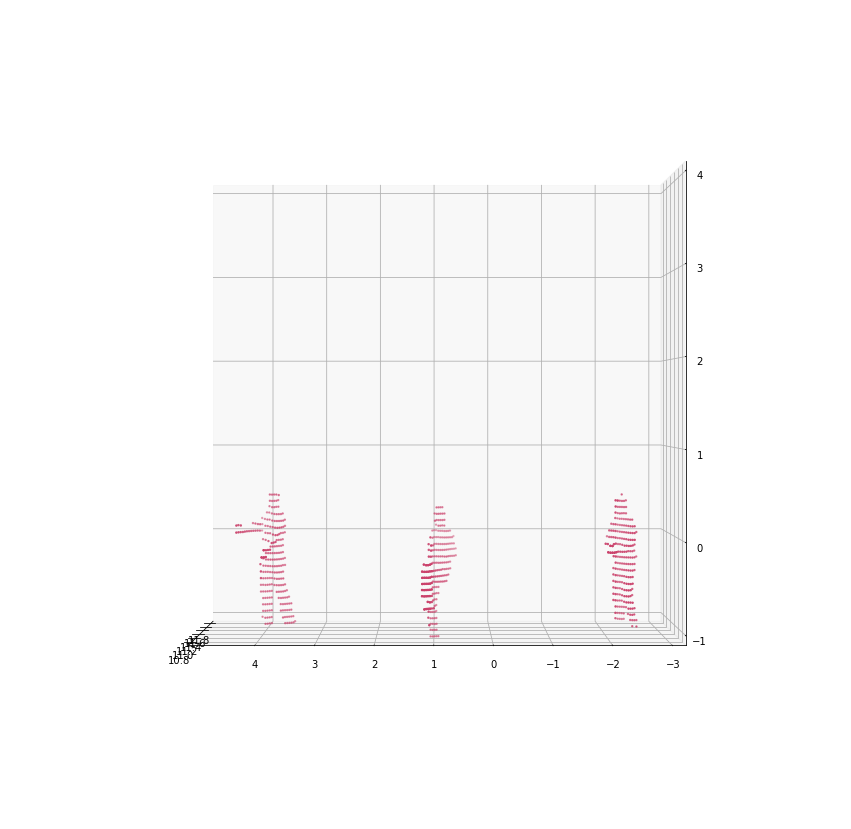

In [3]:
found=[]
from tqdm import tqdm
# raise RuntimeError(len(result))
for image_id in range(len(result)):
    pkl = result[image_id]
    # raise RuntimeError(len(pkl))
    kp_out,seq_pc,seq_gt,data = pkl
    for a,x in enumerate(data['img_path']):
        for b,y in enumerate(x):
            # raise RuntimeError(y)
            # for T in range(7,235,20):#/remote-home/share/Lidar-IMU/STPerson/527-keep/ori_img/4710.jpg
            #     if y == '/remote-home/share/Lidar-IMU/STPerson/aaai/ori_img/'+str(T)+'.jpg':
            #         found.append((image_id,a,b))
            # 2023
            # T = 1394 1987 3103
            T = 3103
            if y == '/remote-home/share/Lidar-IMU/STPerson/527-keep/ori_img/'+str(T)+'.jpg':
                found.append((image_id,a,b))
                # raise RuntimeError(data.keys())
                # print(data['img_path'][a][b])
print(found)
colors = [
    'xkcd:bluish purple',#0
    'xkcd:bluish purple',#1
    'xkcd:pink',
    'xkcd:golden yellow',
    'xkcd:pink',
    'xkcd:golden yellow',
    'xkcd:bluish purple',
    'xkcd:bluish purple',
    'xkcd:pink',
    'xkcd:pink',
    'xkcd:bluish purple',
    'xkcd:bluish purple',
    'xkcd:pink',
    'xkcd:pink',
    'xkcd:sky blue',
    'xkcd:red orange',
    'xkcd:light pink',
    'xkcd:light pink',
    'xkcd:light pink',      # 鼻子到右眼
    'xkcd:light pink'       # 鼻子到左眼
]
# import matplotlib as plt
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
ax.view_init(elev=0, azim=180)
# ax.view_init(elev=5, azim=175)
for tpl in found:
    image_id,a,b = tpl
    [kp_out,seq_pc,seq_gt,data] = result[image_id]
    index = [b,a]
    kp_pcd = np.array(kp_out[index[0],index[1],...].detach()).astype(np.float64)
    point_pose = np.stack((kp_out[index[0],index[1],...].detach()))
    mean_fix = np.array(data['data_ori_mean'][index[0]][index[1]])
    point_pose = mean_fix+point_pose
    x = point_pose[:,0]
    y = point_pose[:,1]
    z = point_pose[:,2]
    pc = np.stack((data['data'][index[0],index[1],...].detach()))
    mean_fix = np.array(data['data_ori_mean'][index[0]][index[1]])
    pc = mean_fix+pc
    ax.scatter3D(pc[:,0],pc[:,1],pc[:,2],c  = '#cb416b',s=2)
    for pair,color in zip(connect,colors):
        xs = np.array(np.linspace(x[pair[0]],x[pair[1]],100))
        ys = np.array(np.linspace(y[pair[0]],y[pair[1]],100))
        zs = np.array(np.linspace(z[pair[0]],z[pair[1]],100))
        # ax.plot(xs, ys, zs,c=color,linewidth=4)
# ax.set_ylim(ymin=-3,ymax=5)
# ax.set_xlim(xmin=10.75,xmax=12.5)
ax.set_zlim(zmin=-1,zmax=4)
# plt.xticks([np.arange(10, 12, 1)])
# plt.yticks([np.arange(-2, 2, 0.3)])
# plt.axis('off')
# plt.zticks([])
# plt.axes().get_xaxis().set_visible(False)
# plt.axes().get_yaxis().set_visible(False)
# plt.axes().get_zaxis().set_visible(False)
plt.savefig("./"+str(T)+".png")
plt.show()

/tmp/ipykernel_313/1006866795.py:87: MatplotlibDeprecationWarning: 
The `zmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  ax.set_zlim(zmin=-1,zmax=4)
/tmp/ipykernel_313/1006866795.py:87: MatplotlibDeprecationWarning: 
The `zmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  ax.set_zlim(zmin=-1,zmax=4)


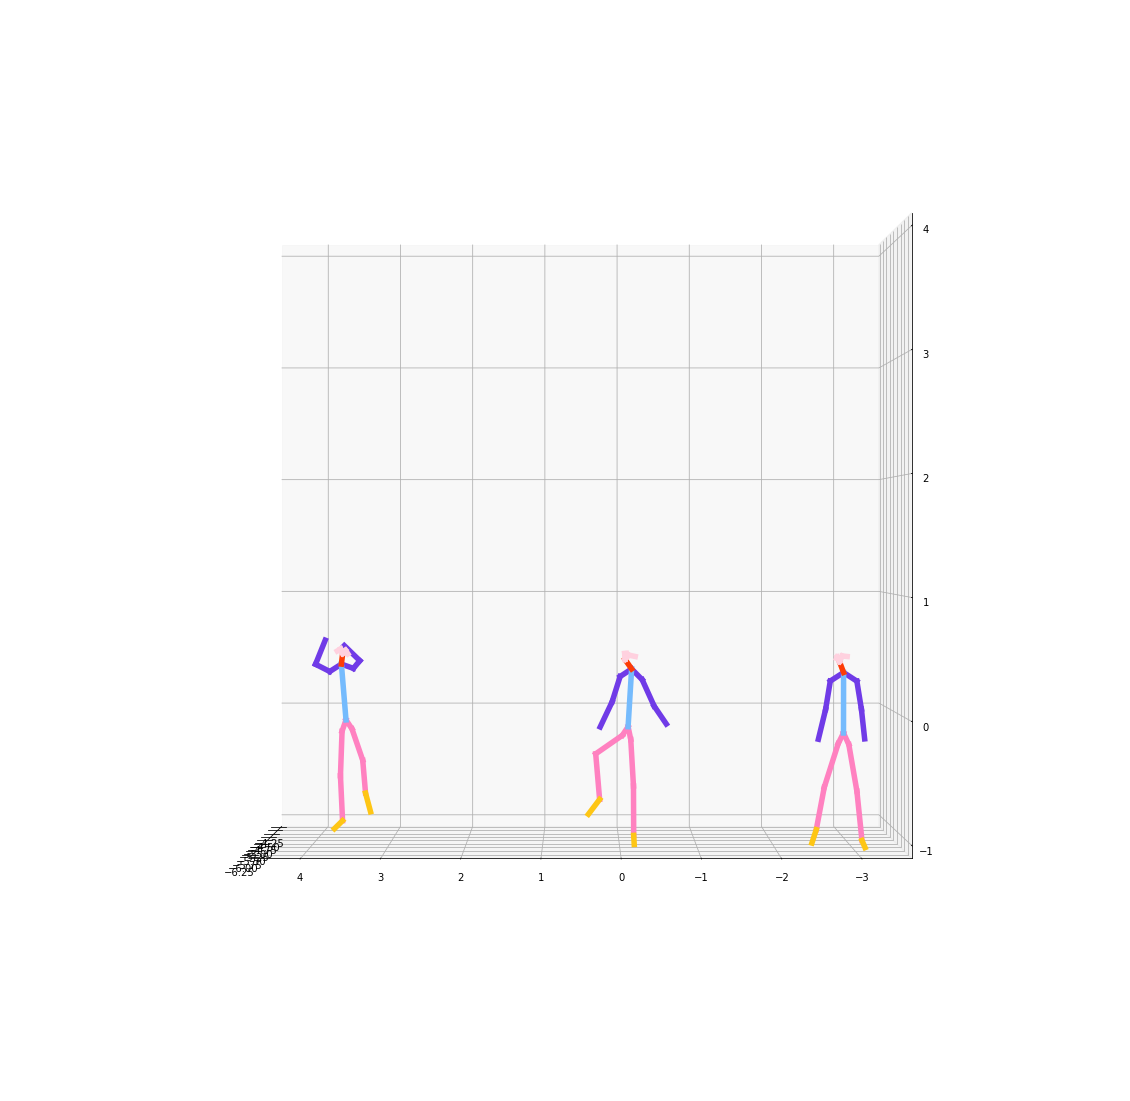

In [10]:
found=[]
from tqdm import tqdm
# raise RuntimeError(len(result))
for image_id in range(len(result)):
    pkl = result[image_id]
    # raise RuntimeError(len(pkl))
    kp_out,seq_pc,seq_gt,data = pkl
    for a,x in enumerate(data['img_path']):
        for b,y in enumerate(x):
            # raise RuntimeError(y)
            # for T in range(7,235,20):#/remote-home/share/Lidar-IMU/STPerson/527-keep/ori_img/4710.jpg
            #     if y == '/remote-home/share/Lidar-IMU/STPerson/aaai/ori_img/'+str(T)+'.jpg':
            #         found.append((image_id,a,b))
            # 2023
            # T = 1394 1987 3103
            T = 1987
            if y == '/remote-home/share/Lidar-IMU/STPerson/527-keep/ori_img/'+str(T)+'.jpg':
                found.append((image_id,a,b))
                # raise RuntimeError(data.keys())
                # print(data['img_path'][a][b])
colors = [
    'xkcd:bluish purple',#0
    'xkcd:bluish purple',#1
    'xkcd:pink',
    'xkcd:golden yellow',
    'xkcd:pink',
    'xkcd:golden yellow',
    'xkcd:bluish purple',
    'xkcd:bluish purple',
    'xkcd:pink',
    'xkcd:pink',
    'xkcd:bluish purple',
    'xkcd:bluish purple',
    'xkcd:pink',
    'xkcd:pink',
    'xkcd:sky blue',
    'xkcd:red orange',
    'xkcd:light pink',
    'xkcd:light pink',
    'xkcd:light pink',      # 鼻子到右眼
    'xkcd:light pink'       # 鼻子到左眼
]
# import matplotlib as plt
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(20,20)).add_subplot(projection='3d')
ax.view_init(elev=0, azim=180)
with open('./demo/demo/kp3d.pkl','rb') as f:
    hybrIK_ori = np.array(pickle.load(f))[1]
    hybrIK = np.zeros_like(hybrIK_ori)
    # print(hybrIK.shape)
    hybrIK[0] = hybrIK_ori[1]
    hybrIK[1] = hybrIK_ori[0]
    hybrIK[2] = hybrIK_ori[2]
    for i in range(3):
        image_id,a,b = found[i]
        [kp_out,seq_pc,seq_gt,data] = result[image_id]
        index = [b,a]
        kp_pcd = np.array(kp_out[index[0],index[1],...].detach()).astype(np.float64)
        point_pose = hybrIK[i]

        point_pose = (point_pose.dot(np.array(
            [
                [0,-2,0],
                [0,0,-2],
                [-2,0,0]
            ]
        )
        ))
        
        pc = np.stack((data['data'][index[0],index[1],...].detach()))
        mean_fix = np.array(data['data_ori_mean'][index[0]][index[1]])
        pc = mean_fix+pc
        # ax.scatter3D(pc[:,0],pc[:,1],pc[:,2],c  = 'r',s=2)
        point_pose += mean_fix
        x = point_pose[:,0]
        y = point_pose[:,1]
        if i==1:
            y-=0.8
        z = point_pose[:,2]
        for pair,color in zip(connect,colors):
            xs = np.array(np.linspace(x[pair[0]],x[pair[1]],100))
            ys = np.array(np.linspace(y[pair[0]],y[pair[1]],100))
            zs = np.array(np.linspace(z[pair[0]],z[pair[1]],100))
            ax.plot(xs, ys, zs,c=color,linewidth=5.5)
# ax.set_ylim(ymin=7.8,ymax=8.6)
# ax.set_zlim(zmin=-0.4,zmax=0.3)
ax.set_zlim(zmin=-1,zmax=4)
plt.savefig("./"+str(T)+".png")
plt.show()

In [ ]:
# ax.set_ylim(ymin=7.8,ymax=8.6)
# ax.set_zlim(zmin=-0.4,zmax=0.3)
ax.set_zlim(zmin=-1,zmax=4)
plt.savefig("./"+str(T)+".png")
plt.show()

## file convert

/remote-home/share/Lidar-IMU/STPerson/527-keep/ori_img/1406.jpg
(21, 3)
(21, 2)


/tmp/ipykernel_8276/2868519778.py:59: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cv2.line(img,tuple(pt1.astype(np.int)),tuple(pt2.astype(np.int)),color)
/tmp/ipykernel_8276/2868519778.py:69: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

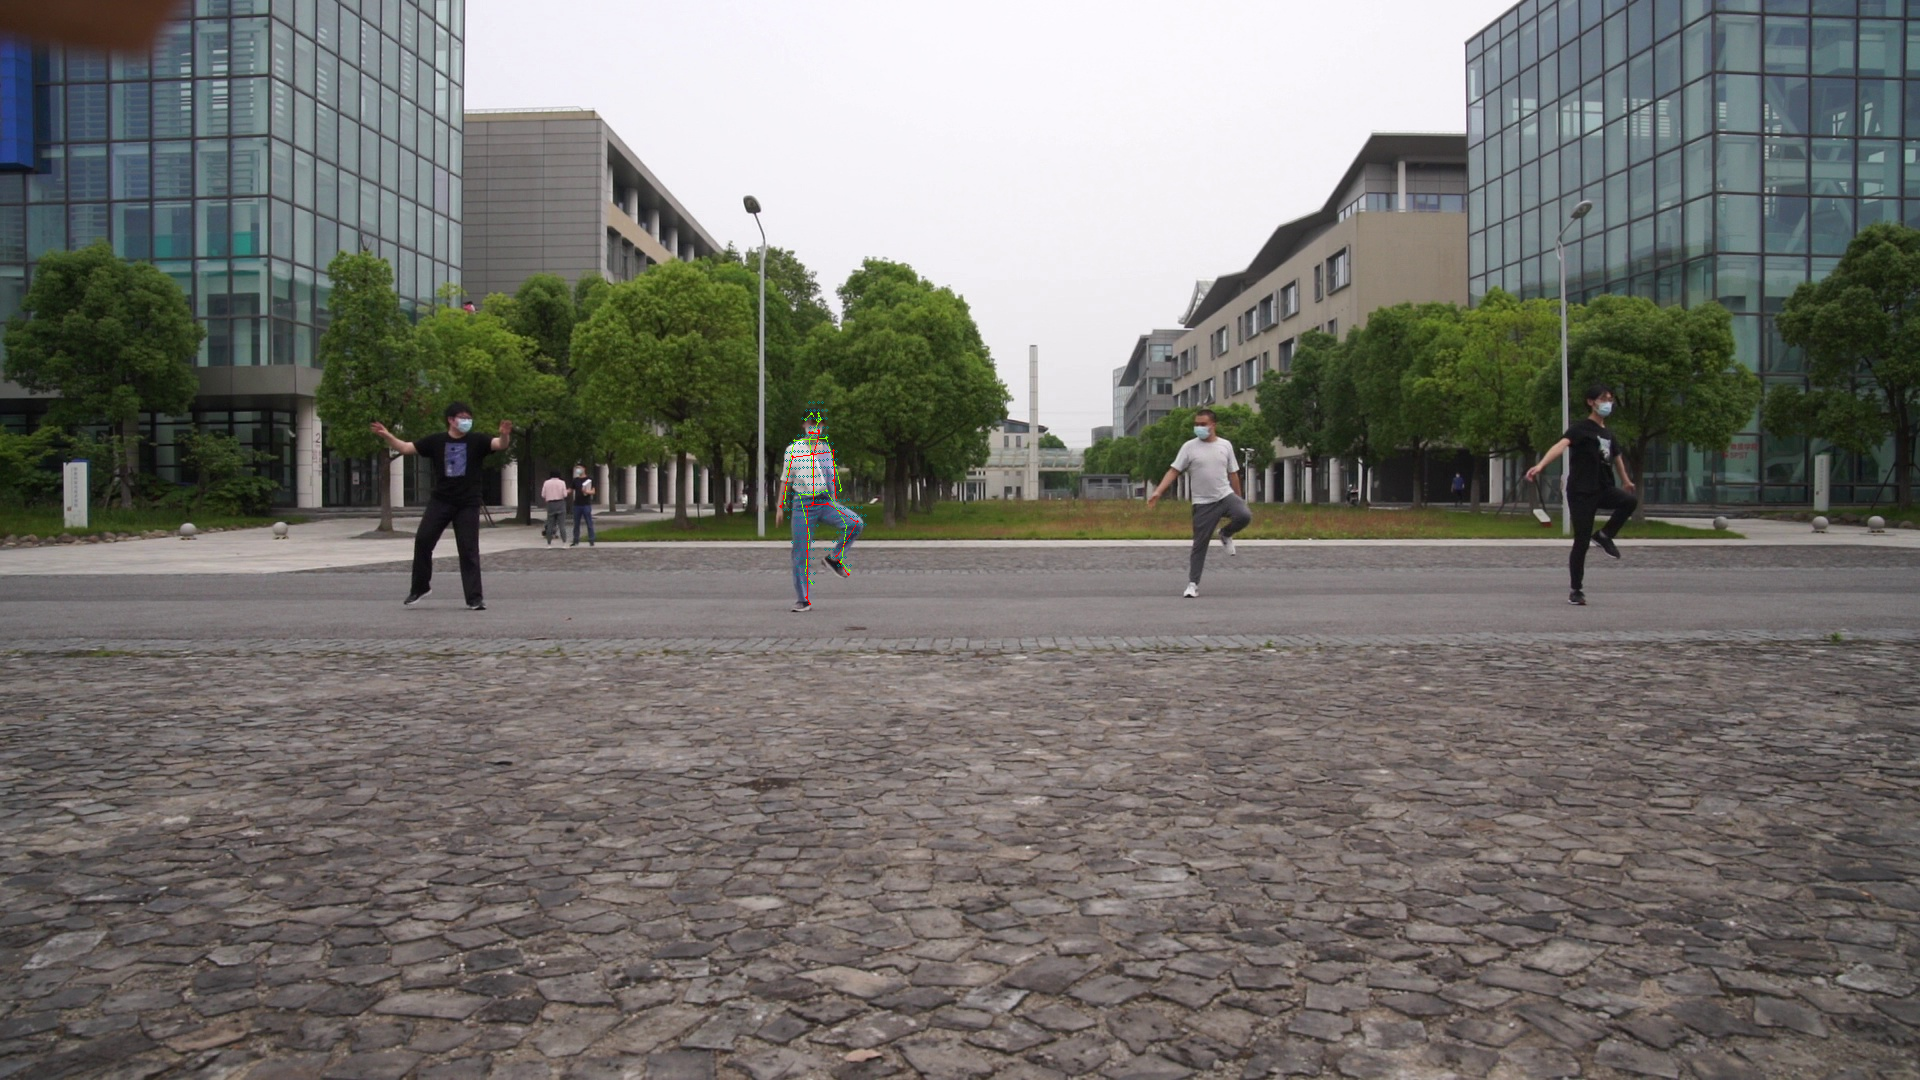

In [70]:
import cv2
image_id,a,b = found[1]
[kp_out,seq_pc,seq_gt,data] = result[image_id]
index = [b,a]
# raise RuntimeError(kp_out.shape)
kp_pcd = np.array(kp_out[index[0],index[1],...].detach()).astype(np.float64)
# raise RuntimeError(kp_pcd.shape)
point_pose = np.stack((kp_out[index[0],index[1],...].detach()))

mean_fix = np.array(data['data_ori_mean'][index[0]][index[1]])
point_pose = mean_fix+point_pose
print(data['img_path'][index[1]][index[0]])
img_path = data['img_path'][index[1]][index[0]]
# img_path = data['img_path'][index[1]][index[0]][:-9] + '.jpg'
# raise RuntimeError(img_path)
# raise RuntimeError(point_pose.shape) 21 3
if data['camera_calib'][0] == 'camera_new.json':
    show_pose_on_image(
                            point_pose,
                            data['gt'][index[0],index[1]].numpy(),
                            np.array(seq_pc[index[0],index[1]])+mean_fix,
                            img_path,3840,2160,camera_json ='./camera_new.json' 
    )
elif data['camera_calib'][0] == 'camera_lidarcap.json':
    show_pose_on_image( point_pose,
                        data['gt'][index[0],index[1]].numpy(),
                        np.array(seq_pc[index[0],index[1]])+mean_fix,
                        img_path,122,122,camera_json =data['camera_calib'][0],
                        bbox =  data['bbox'][index[0],index[1]].numpy()

    )
elif data['camera_calib'][0] == 'camera_hybridcap.json':
    show_pose_on_image( point_pose,
                        data['gt'][index[0],index[1]].numpy(),
                        np.array(seq_pc[index[0],index[1]])+mean_fix,
                        img_path,4096,2160,camera_json =data['camera_calib'][0]
    )
# elif data['camera_calib'][0] == 'camera_hybridcap.json':
#     show_pose_on_image( point_pose,
#                         point_pose,
#                         point_pose,
#                         img_path,4096,2160,camera_json =data['camera_calib'][0]
#     )
else:
    show_pose_on_image(
                            point_pose,
                            (data['gt'][index[0],index[1]].numpy()),
                            np.array(seq_pc[index[0],index[1]])+mean_fix,
                            img_path,1280,720,camera_json =data['camera_calib'][0])
from PIL import Image
image = Image.open("./image_#.png")
image

In [5]:
with open('./result-ori.pkl','rb') as f:
    result = pickle.load(f)  

FileNotFoundError: [Errno 2] No such file or directory: './result-ori.pkl'

In [ ]:
[kp_out,seq_pc,seq_gt,data] = result[1]

In [ ]:
img_path_l = []
img_origin_path = []
crop_bbox = []
pre_kp_3d = []
gt_kp_2d = []
pcd = []
for k in range(len(result)):
    [kp_out,seq_pc,seq_gt,data] = result[k]
    for i in range(8):
        for j in range(4):
            index = [i,j]
            assert data['example_list'][j]['image_ori_path'][i] == data['img_path'][j][i]
            kp_pcd = np.array(kp_out[i,j,...].detach()).astype(np.float64)
            mean_fix = np.array(data['data_ori_mean'][i][j])
            point_pose = mean_fix+kp_pcd
            pre_kp_3d.append(point_pose)
            img_path_l.append(data['example_list'][j]['image_path'][i])
            img_origin_path.append(data['img_path'][j][i])
            
            pcd.append(np.array(seq_pc[index[0],index[1]])+mean_fix)
            crop_bbox.append([
                data['example_list'][j]['image_bbox'][0][i],
                data['example_list'][j]['image_bbox'][1][i],
                data['example_list'][j]['image_bbox'][2][i],
                data['example_list'][j]['image_bbox'][3][i]]
                              )
            gt_kp_2d.append(data['gt'][index[0],index[1]].numpy())
            
info = {
    'img_path':img_path_l,
    'img_origin_path':img_origin_path,
    'crop_bbox':crop_bbox,
    'pre_kp_3d':pre_kp_3d,
    'gt_kp_2d':gt_kp_2d,
    'pointcloud':pcd
}
with open('./anno.pkl','wb') as f:
    result = pickle.dump(info,f) 

In [ ]:
import cv2
with open('./anno.pkl','rb') as f:
    info = pickle.load(f) 

### own-dataset analysis
This if for counting the point num in the dataset

In [ ]:
with open('./kp21_openpose.pkl','rb') as f:
    result = pickle.load(f) 

pc_shape_list = []
for i in range(len(result)):

    pc_path = '/remote-home/share/STCrowd/crop_result/'+result[i]['lidar_path'].split('/')[-2]+'/'+result[i]['lidar_path'].split('/')[-1]
    pc_data = np.fromfile(pc_path,dtype=np.float32).reshape([-1,4])[:,:3]
    pc_shape_list.append(pc_data.shape[0])

In [ ]:
pc_shape_l = np.array(pc_shape_list)
pc_shape_l = pc_shape_l[pc_shape_l>500]

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
durations = pc_shape_l
plt.figure(figsize=(15,5))
nums,bins,patches = plt.hist(durations,bins=10,edgecolor='k')
plt.xticks(bins,bins)
for num,bin in zip(nums,bins):
    plt.annotate(num,xy=(int(bin),int(num)),xytext=(int(bin+1.5),int(num+0.5)))
plt.show()

In [ ]:
nums

In [ ]:
# pc_shape_list

### test the transform and crop image kp result

In [ ]:
with open('./anno.pkl','rb') as f:
    info = pickle.load(f) 
ind = 50
show_pose_on_image(
    info['gt_kp_2d'][ind],
    info['pre_kp_3d'][ind],
    info['pointcloud'][ind],
    info['img_origin_path'][ind],1280,720)

In [ ]:
from torchvision import datasets, transforms
from PIL import Image
img_crop_path = '/remote-home/share/STCrowd/'+'/'.join(info['img_path'][ind].split('/')[1:])
img = Image.open(img_crop_path).convert('RGB')     # 0~255
###define process
image_transforms = {
    'test': transforms.Compose([transforms.Resize((256, 128)),
                                transforms.ToTensor()])
}
transform = image_transforms['test']
img2 = transform(img)###image process
re_img = np.asarray(transforms.ToPILImage()(img2))###
cv2.imwrite('./temp.jpg',re_img)###save
gt_j = info['gt_kp_2d'][ind]
img_kp_gt = np.zeros_like(gt_j)
w,h = info['crop_bbox'][ind][2].numpy(), info['crop_bbox'][ind][3].numpy()
# w -- h |

img_kp_gt = np.array(gt_j)
img_kp_gt[:,0] -= info['crop_bbox'][ind][0].numpy()
img_kp_gt[:,1] -= info['crop_bbox'][ind][1].numpy()
img_kp_gt[:,0] *= (1 / w * 128)
img_kp_gt[:,1] *= (1 / h * 256)

img_kp_gt[:,0] += 64
img_kp_gt[:,1] += 128

# img_kp_gt[:,0] = (gt_j[:,0] - (info['crop_bbox'][ind][0]-w/2).numpy())/ w*128
# img_kp_gt[:,1] = (gt_j[:,1] - (info['crop_bbox'][ind][1]-h/2).numpy())/ h*256

img = cv2.imread('./temp.jpg')
pose2d = img_kp_gt
    # Index of points in fov
img_width,img_height = 128,256
fov_inds = (
    (pose2d[:, 0] < img_width)
    & (pose2d[:, 0] >= 0)
    & (pose2d[:, 1] < img_height)
    & (pose2d[:, 1] >= 0)
)
fov_inds = fov_inds & (img_kp_gt[:, 0] > 0)
imgfov_pose2d = pose2d[fov_inds,:]

color = np.random.randint(0,255,(1,3)).squeeze(0)
color = tuple([int(x) for x in color])
for i in range(imgfov_pose2d.shape[0]):
    cv2.circle(
        img,
        (int(np.round(imgfov_pose2d[i, 0])), int(np.round(imgfov_pose2d[i, 1]))),
        2,
        color=color,
        thickness=-1,
    )
connect = np.array([(0,4),(1,5),(2,6),(2,19),(3,7),(3,20),(4,8),(5,9),
                            (6,10),(7,12),(8,14),(9,14),(10,11),(11,12),(11,14),(13,14),
                            (13,15),(13,16),(15,17),(16,18)])
# connect  = np.array([[0,1],[1,2],[2,3],[0,4],[4,5],[5,6],[8,7],[0,7],[8,11],[11,12],[12,13],[8,14],[14,15],[15,16],[8,9],[9,10]])

for i in range(len(connect[:,0])):
    if fov_inds[connect[i][0]] & fov_inds[connect[i][1]]:
        pt1 = np.round(pose2d[connect[i][0]])
        pt2 = np.round(pose2d[connect[i][1]])
        cv2.line(img,tuple(pt1.astype(np.int)),tuple(pt2.astype(np.int)),color)
# cv2.imshow("Pose_proj", img)
cv2.imwrite("./image.png",img)

image = Image.open("./temp.jpg")
image
image = Image.open("./image.png")
image

## Lidarcap file

In [ ]:
# with open('/remote-home/share/Lidar-IMU/lidarhuman26M/LidarM_openpose.pkl','rb') as f:
with open('./LidarM_openpose2.pkl','rb') as f:
    info_2d = pickle.load(f) 

In [ ]:
count = 0
group_dict = {}
for i in range(len(info_2d)-1):
    current = info_2d[i]['image_path']
    next_ = info_2d[i+1]['image_path']
    if current.split('/')[-2] == next_.split('/')[-2]:
        info_2d[i]['group'] = int(current.split('/')[-2])
    else:
        count += 1
        info_2d[i]['group'] = int(current.split('/')[-2])
    group_dict[next_.split('/')[-2]] = count
    if 'valid' not in info_2d[i].keys():
        info_2d[i]['valid'] = 'empty'
    
info_2d[i+1]['group']  = int(current.split('/')[-2])


In [ ]:
info_2d_ori = list(np.load('./LidarM_openpose.pkl',allow_pickle=True))
# openpose kp2d 
info = list(np.load('/remote-home/share/Lidar-IMU/lidarhuman26M/lidarhuman.pkl',allow_pickle=True)) 
# this is joint kp info 

In [ ]:
rotation_offset =np.matmul(
            np.array([
                    [1,0,0],
                    [0,np.cos(-np.pi/12),-np.sin(-np.pi/12)],
                    [0,np.sin(-np.pi/12),np.cos(-np.pi/12)]
            ]),
            np.array([
                [0,-1,0],
                [1,0,0],
                [0,0,1]
            ])
        )
rotation_offset.shape

In [ ]:
for i in range(len(info)):
    info_2d[i]['gt_joint']  = np.matmul(info[i]['gt_joint'].reshape(-1,3),rotation_offset)
    info_2d[i]['pc_path'] = info_2d_ori[i]['pc_path']
    info_2d[i]['image_path'] = info_2d[i]['image_path'].replace('images','new_images')

In [ ]:
info_train,info_test = [],[]
from plyfile import PlyData
for i in range(len(info_2d)):
# for i in range(2510,2530):
    if info_2d[i]['group'] in [7, 24, 29, 41]:
        # print(i)
        pc_path = '/remote-home/share/Lidar-IMU/lidarhuman26M/' + info_2d[i]['pc_path']
        plydata = PlyData.read(pc_path)
        pc_data = np.transpose(np.array([plydata['vertex']['x'],
                                        plydata['vertex']['y'],
                                        plydata['vertex']['z']]).reshape(3,-1),(1,0))
        pc_data,data_mean = norm_pc(pc_data)
        if np.random.random() > 0.4: 
            pc_data_new = crop_pc(pc_data)
            while pc_data_new.shape[0] < 10:
                pc_data_new = crop_pc(pc_data)
            pc_data = pc_data_new
        info_2d[i]['lidar_crop'] = pc_data
        info_test.append(info_2d[i])
    else:
        info_train.append(info_2d[i])

with open('/remote-home/share/Lidar-IMU/lidarhuman26M/train_info.pkl','wb') as f:
    result = pickle.dump(info_train,f) 
with open('/remote-home/share/Lidar-IMU/lidarhuman26M/test_info.pkl','wb') as f:
    result = pickle.dump(info_test,f) 

In [ ]:
len(info_train),len(info_test)

In [ ]:
# for i in range(len(info_2d)):
info_2d[0]


目前有2d的gt的数据共6.8w 数据可用，22组，15组作为train，7组作为val

In [ ]:
ind = 60006
from plyfile import *
def norm_pc(points):
    pc_mean = np.mean(points,0).reshape(1,-1)
    new_pc = points - pc_mean
    return new_pc,pc_mean

root_path = '/remote-home/share/Lidar-IMU/lidarhuman26M/'
json_path = root_path+info_2d[ind]['pc_path'].replace('segment','pose').replace('ply','json')
with open(json_path, 'r') as f:
    s1 = json.load(f)

plydata = PlyData.read(root_path + info_2d[ind]['pc_path'])
pc_data = np.transpose(np.array([plydata['vertex']['x'],
                            plydata['vertex']['y'],
                            plydata['vertex']['z']]).reshape(3,-1),(1,0))
pc_data,data_mean = norm_pc(pc_data)
print(pc_data.shape)
# pose = np.array(s1['trans']+info_2d[ind]['gt_joint'])
pose = np.array(data_mean+info_2d[ind]['gt_joint'])
show_pose_on_image( pose,
                        pose,
                        pc_data+data_mean,
                        '/remote-home/share/Lidar-IMU/lidarhuman26M/'+info_2d[ind]['image_path'],122,122,camera_json ='./camera_lidarcap.json',
                        bbox =  np.array(info_2d[ind]['bbox']))
image = Image.open("/remote-home/xuyt/gallery/AttnetionFusion_LiDARCAP_LAST_temporal/image.png")
image

In [ ]:
pc_shape_list = []
for ind in range(0,len(info_2d)):
    root_path = '/remote-home/share/Lidar-IMU/lidarhuman26M/'
    plydata = PlyData.read(root_path + info_2d[ind]['pc_path'])
    pc_shape_list.append(np.array(plydata['vertex']['x']).shape[0])

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
durations = pc_shape_l
plt.figure(figsize=(15,5))
nums,bins,patches = plt.hist(durations,bins=10,edgecolor='k')
plt.xticks(bins,bins)
for num,bin in zip(nums,bins):
    plt.annotate(num,xy=(int(bin),int(num)),xytext=(int(bin+1.5),int(num+0.5)))
plt.show()

In [ ]:
pc_shape_list = np.array(pc_shape_list)
pc_shape_l = pc_shape_list[pc_shape_list>100]
len(pc_shape_list),len(pc_shape_l)

In [ ]:
with open('./26m-21kp.pkl','rb') as f:
    info = pickle.load(f)

In [ ]:
img_path = '/remote-home/share/Lidar-IMU/lidarhuman26M/' + info[137]['image_path']

In [ ]:
img = cv2.imread(img_path)
pose2d = info[137]['kp_2d']
    # Index of points in fov
img_width,img_height = 122,122
fov_inds = (
    (pose2d[:, 0] < img_width)
    & (pose2d[:, 0] >= 0)
    & (pose2d[:, 1] < img_height)
    & (pose2d[:, 1] >= 0)
)
fov_inds = fov_inds & (pose2d[:, 0] > 0)
imgfov_pose2d = pose2d[fov_inds,:]
print(imgfov_pose2d)

color = np.random.randint(0,255,(1,3)).squeeze(0)
color = tuple([int(x) for x in color])
for i in range(imgfov_pose2d.shape[0]):
    cv2.circle(
        img,
        (int(np.round(imgfov_pose2d[i, 0])), int(np.round(imgfov_pose2d[i, 1]))),
        2,
        color=color,
        thickness=-1,
    )
connect = np.array([(0,4),(1,5),(2,6),(2,19),(3,7),(3,20),(4,8),(5,9),
                            (6,10),(7,12),(8,14),(9,14),(10,11),(11,12),(11,14),(13,14),
                            (13,15),(13,16),(15,17),(16,18)])
# connect  = np.array([[0,1],[1,2],[2,3],[0,4],[4,5],[5,6],[8,7],[0,7],[8,11],[11,12],[12,13],[8,14],[14,15],[15,16],[8,9],[9,10]])

for i in range(len(connect[:,0])):
    if fov_inds[connect[i][0]] & fov_inds[connect[i][1]]:
        pt1 = np.round(pose2d[connect[i][0]])
        pt2 = np.round(pose2d[connect[i][1]])
        cv2.line(img,tuple(pt1.astype(np.int)),tuple(pt2.astype(np.int)),color)
# cv2.imshow("Pose_proj", img)
cv2.imwrite("./image.png",img)


In [ ]:
from PIL import Image
image = Image.open("./image.png")
image